In [1]:
# In this notebook we will be doing the exploratory data analysis of the 'nyc_taxi_trip_duration.csv' provided to us.


In [2]:
# Problem Statement:- To predict the taxi trip duration at the point when the trip is about to start.

# Keeping the problem statement in mind lets start the EDA process.

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# reading our dataframe as df
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# lets look at some descriptive features about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
# There are a total of 729322 rows and 11 columns in our data and we can see that there are no missing values in our data
# We can see the data types of each column 
# The pickup_datetime and dropoff_datetime variable needs to be converted to datetime object

In [7]:
import datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [8]:
# Let's see some descriptive statistics of our data
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
# Here we can get an overall idea of max , min , avgerage values about our dataset. We will discuss it more during the 
# univariate analysis

In [10]:
# Let's first start from our target variable 'trip_duration'

In [11]:
df['trip_duration'].head()

0     400
1    1100
2    1635
3    1141
4     848
Name: trip_duration, dtype: int64

In [12]:
# this variable explains the duration of the trip in seconds

In [13]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

In [14]:
# both min and max values seems to be outliers(minimum value = 1 second and max value = 1939736 seconds i.e. 538 hours)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

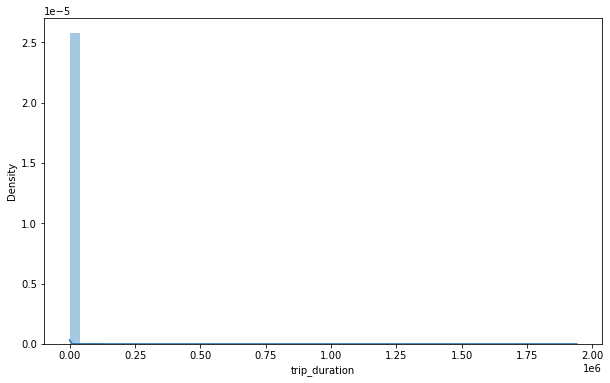

In [15]:
plt.figure(figsize = (10,6))
sns.distplot(df['trip_duration'])

In [16]:
df['trip_duration'].skew()

186.6784368781186

In [17]:
df['trip_duration'].kurt()

87142.4634003971

In [18]:
# We can see the high positive value of skewness shows that the data is positively skewed and we can see that too from the plot
# Also high kurtosis value also states that the data is leptokurtically distributed(heavy outliers , long tail)
#lets just take the log of the values and visualize our dataset more clearly

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration'>

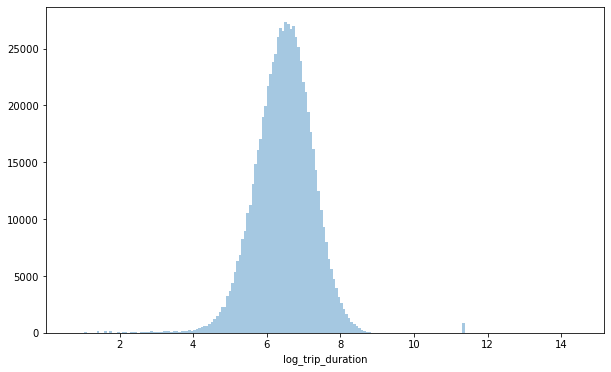

In [19]:
plt.figure(figsize = (10 , 6))
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'] , kde = False , bins = 200)

In [20]:
df['log_trip_duration'].skew()

-0.3003382067923103

In [21]:
df['log_trip_duration'].kurt()

3.804817722097892

In [22]:
# We can see that our data is normally distributed with some outliers on both the sides.

In [23]:
# Let's Start our univariate analysis of our data.

In [24]:
df['id'].head() 
# this id column is like the uniqe identifier for each of the taxi trips.

0    id1080784
1    id0889885
2    id0857912
3    id3744273
4    id0232939
Name: id, dtype: object

In [25]:
df['vendor_id'].head()
# this vendor id column is an indicator indicating the provider associated with the trip record.

0    2
1    1
2    2
3    2
4    1
Name: vendor_id, dtype: int64

In [26]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [27]:
# the vendor_id consists of only two values(vendors). 1 indicates vendor1 and 2 indicates vendor2

In [28]:
df['pickup_datetime'].head()

0   2016-02-29 16:40:21
1   2016-03-11 23:35:37
2   2016-02-21 17:59:33
3   2016-01-05 09:44:31
4   2016-02-17 06:42:23
Name: pickup_datetime, dtype: datetime64[ns]

In [29]:
df['pickup_datetime'].dt.year.value_counts()
# this concludes that all our data is from the year 2016 

2016    729322
Name: pickup_datetime, dtype: int64

In [30]:
df['month_name'] = df['pickup_datetime'].dt.month_name()

In [31]:
df['month_name'].value_counts()

March       128316
April       125634
May         124201
February    119364
June        117406
January     114401
Name: month_name, dtype: int64

In [32]:
# looks like our dataset has the trips from only first six months of the year

In [33]:
# lets see for the hour and day of the week as well to see the trip_durations

In [34]:
df['weekday'] = df['pickup_datetime'].dt.weekday
df['Hour_of_day'] = df['pickup_datetime'].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hour_of_day', ylabel='trip_duration'>

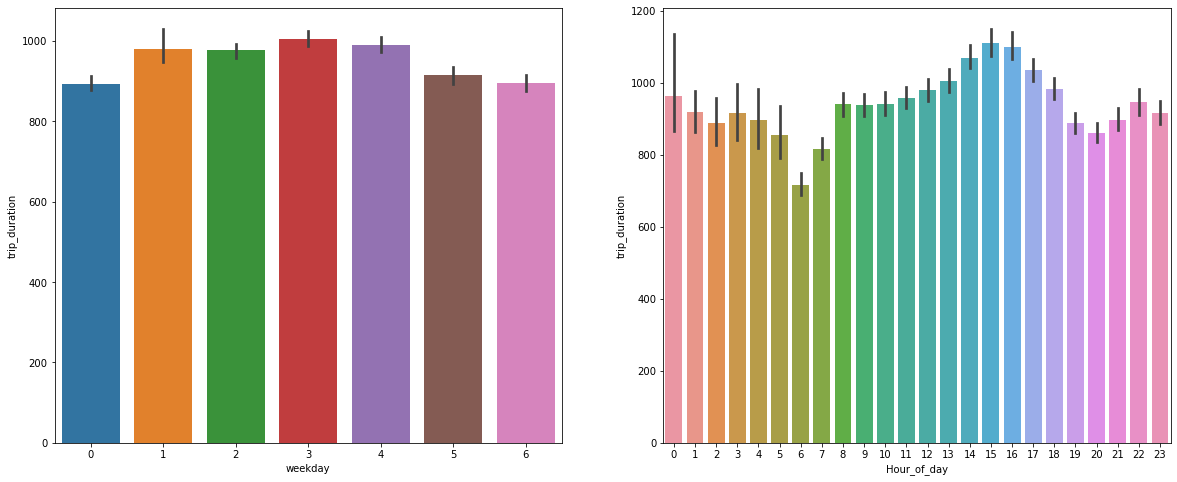

In [35]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot('weekday' , 'trip_duration' , data = df)
plt.subplot(1,2,2)
sns.barplot('Hour_of_day' , 'trip_duration' , data = df)

In [36]:
# Weekends(0 - Sunday , 6 - Saturday) don't have much of rides as compared to the rest of the weekdays.
# Similarly the early morning hours fetch less rides as compared to the evening hours which has more rides.

In [37]:
# lets confirm the trip duration column

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x:x.total_seconds())

In [38]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [39]:
# Seems we have a few of the outliers here too

In [40]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [41]:
# this is a boolean variable so lets convert it to interger type so as to use it further

In [42]:
df['Store_and_Fwd_flag'] = pd.get_dummies(df['store_and_fwd_flag'] , drop_first = True)

In [43]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,month_name,weekday,Hour_of_day,check_trip_duration,Store_and_Fwd_flag
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,5.993961,February,0,16,400.0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,7.003974,March,4,23,1100.0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.400010,February,6,17,1635.0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,7.040536,January,1,9,1141.0,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6.744059,February,2,6,848.0,0


In [44]:
# lets now look at the latitude and longitde

In [45]:
var_group = ['pickup_latitude' , 'pickup_longitude' , 'dropoff_latitude' , 'dropoff_longitude']

In [46]:
def UVA_analysis(data , var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size , 5) , dpi = 140)
    
    for j,i in enumerate(var_group):
        median = df[i].median()
        skew = df[i].skew()
        kurt = df[i].kurtosis()
        
        plt.subplot(1,size,j+1)
        sns.distplot(df[i] , bins = 100)
        plt.title(i + ' \nmedian = {} , \nskewness = {} , \nkurtosis = {}'.format(round(median , 2),
                                                                                 round(skew , 2),
                                                                                 round(kurt , 2)))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

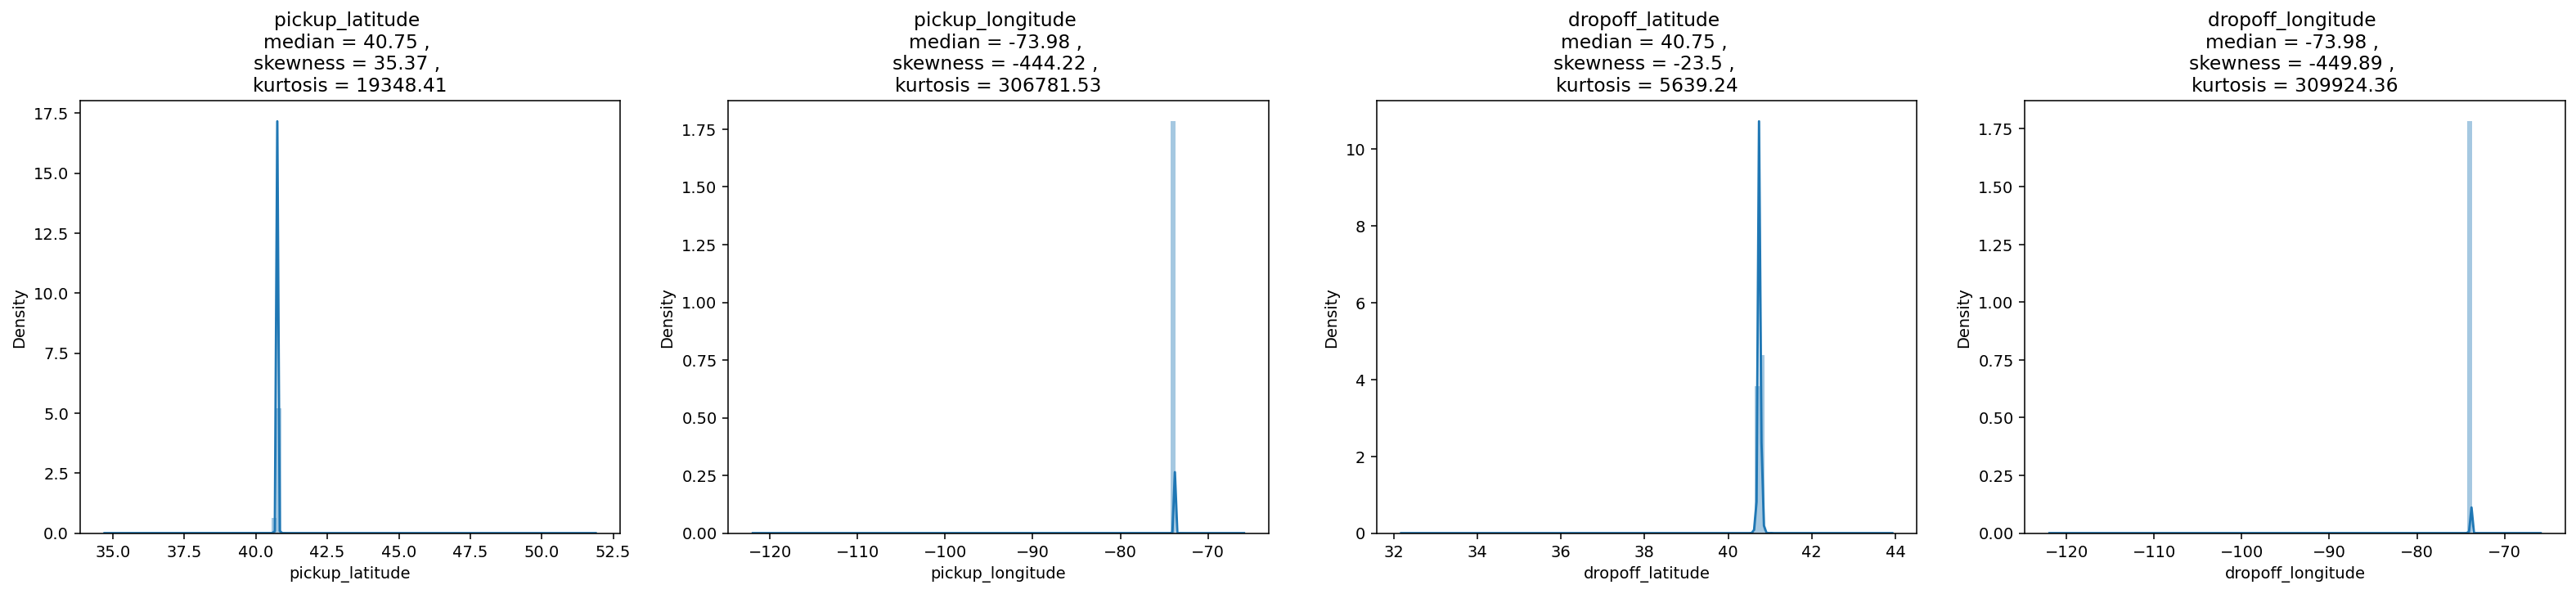

In [47]:
UVA_analysis(df , var_group)

In [48]:
# here we can see that the values(both latitude and longitude) have high values of skewness and kurtosis.
# to see a more better representation , removing some of the outliers from the data and then plotting them again

In [49]:
df = df.loc[(df['pickup_latitude'] > 40.3) & (df['pickup_latitude'] < 40.9)]
df = df.loc[(df['pickup_longitude'] > -74.3) & (df.pickup_longitude < -73.5)]
df = df.loc[(df['dropoff_latitude']>40.3) & (df['dropoff_latitude'] < 40.9)]
df = df.loc[(df['dropoff_longitude'] > -74.3) & (df['dropoff_longitude'] < -73.5)]
new_df = df.copy(deep = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

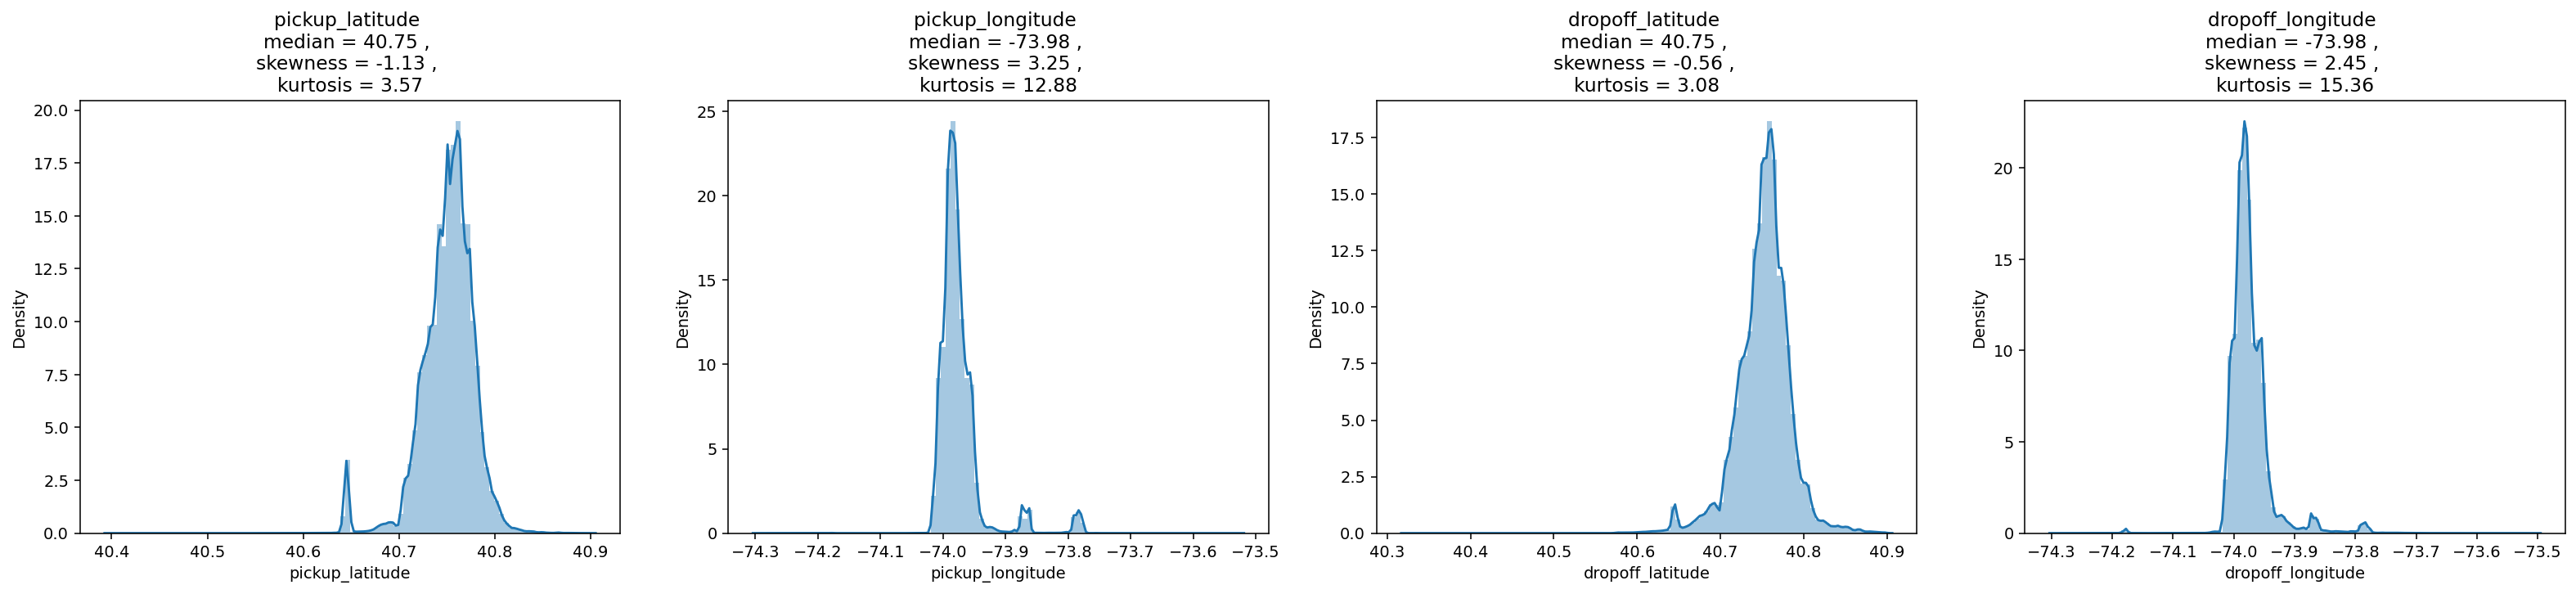

In [50]:
UVA_analysis(new_df , var_group)

In [51]:
# From this plot we can clearly see the co-ordinates where most of our latitudes and longitudes lie
# We can also see the skew and kurtosis value which have reduced drastically from the previous plots.
# the kurtosis value for the longitude is still high positive, which means that it still has some high end values present in it
#(leptokurtic distribution)

In [52]:
# From Here on we are going to do the bivariate analysis of our dataset

In [53]:
# let us see the which vendor provided what length of trip duration

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

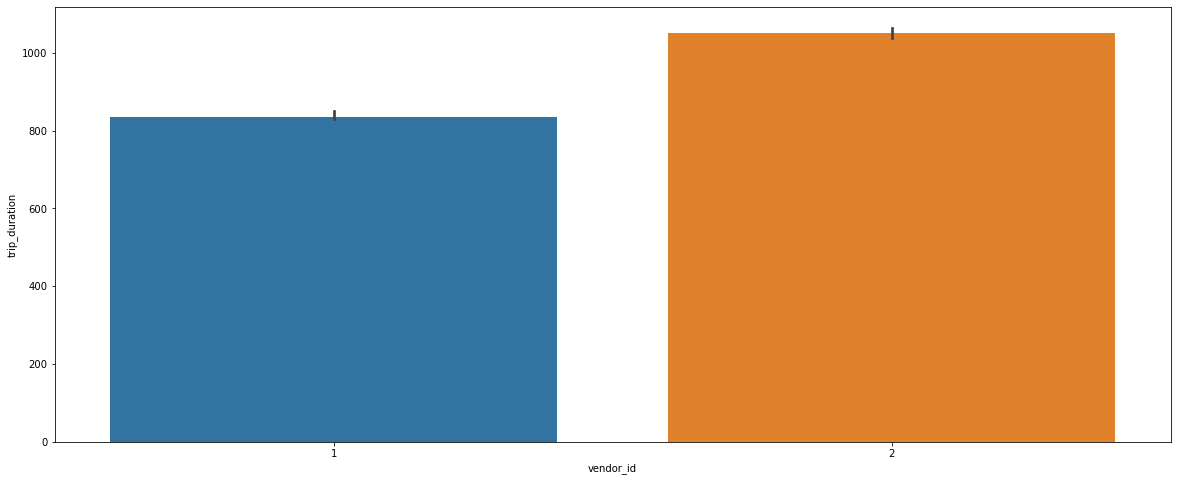

In [54]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'vendor_id' , y = 'trip_duration' , data = df)

In [55]:
# Here we can see the mean trip duration of vendor 1 is fairly less than mean trip duration of vendor 2

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

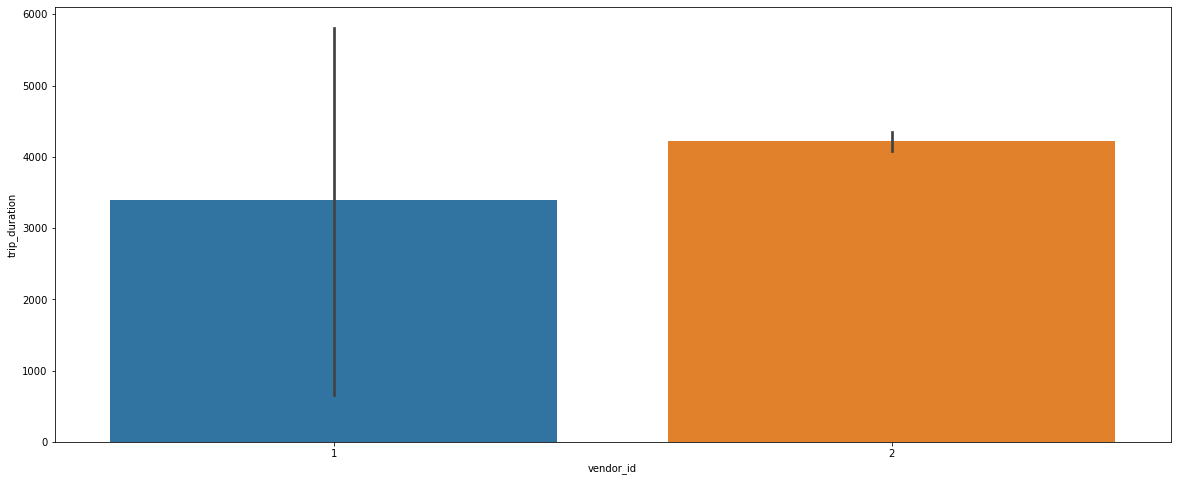

In [56]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'vendor_id' , y = 'trip_duration' , data = df , estimator = np.std)

In [57]:
# From this plot we can infer that vendor 2 has more variability in its data , i.e. it consists of more values away from its mean than vendor 1
# There is a huge possibility that vendor 2 may consist of majority ouliers(on both sides)

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

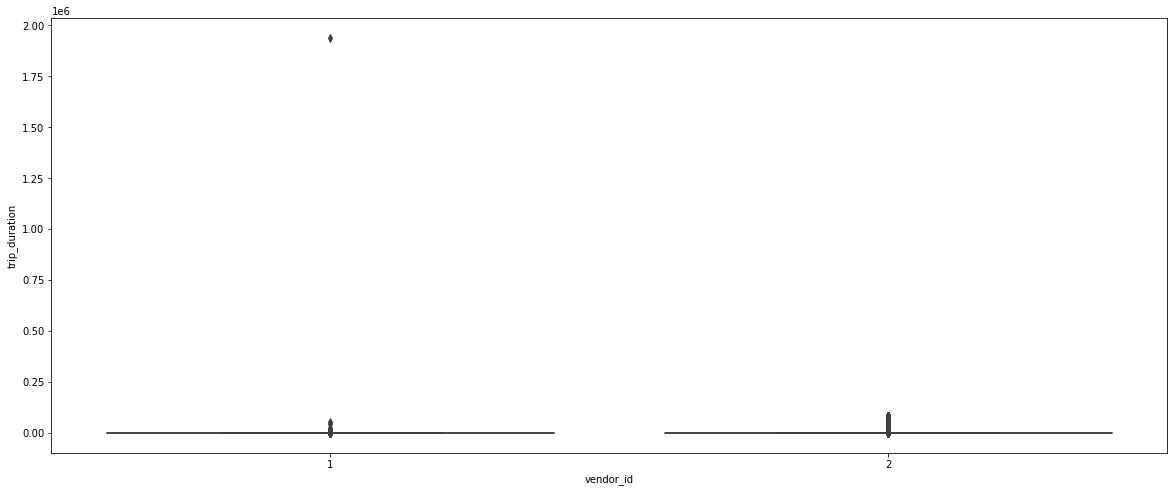

In [58]:
plt.figure(figsize = (20 , 8))
sns.boxplot(x = 'vendor_id' , y = 'trip_duration' , data = df)

In [59]:
# this did not fit well with our statement , lets chop off some huge values and see again

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

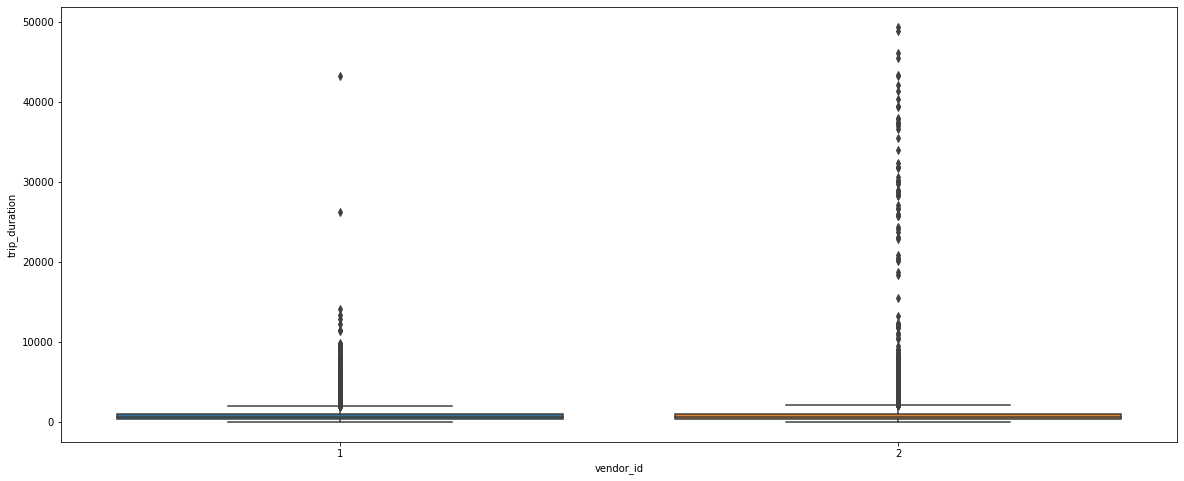

In [60]:
plt.figure(figsize = (20 , 8))
df_chopped = df[df['trip_duration'] < 50000]
sns.boxplot(x = 'vendor_id' , y = 'trip_duration' , data = df_chopped)

In [61]:
# yes now we can clearly see the great amount of outliers present in our vendor 2

In [62]:
# lets see that on what days people tend to take make more drives.

<AxesSubplot:xlabel='weekday', ylabel='trip_duration'>

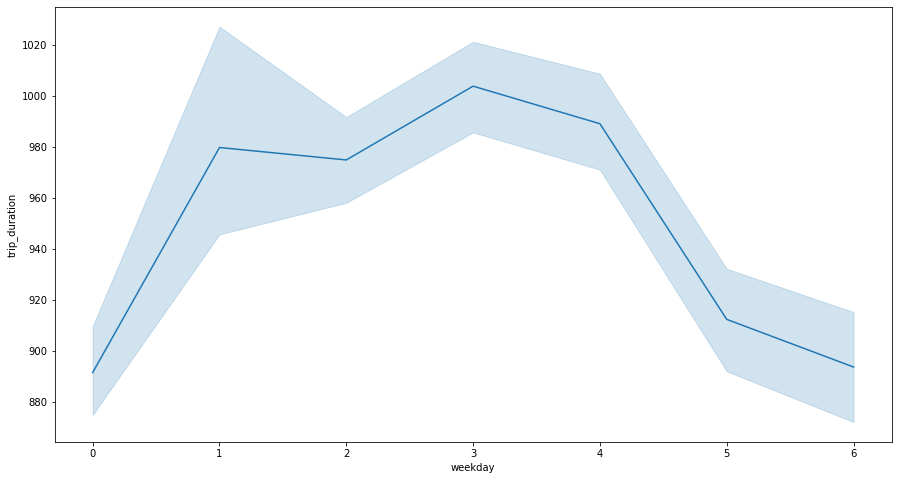

In [63]:
plt.figure(figsize = (15 , 8))
sns.lineplot(x = 'weekday' , y = 'trip_duration' , data = df , err_style = 'band')

In [64]:
# We can observe from this plot that there are fairly less rides on weekends(0-Sunday , 6-Saturday) as compared to the rest of the days

<AxesSubplot:xlabel='Hour_of_day', ylabel='trip_duration'>

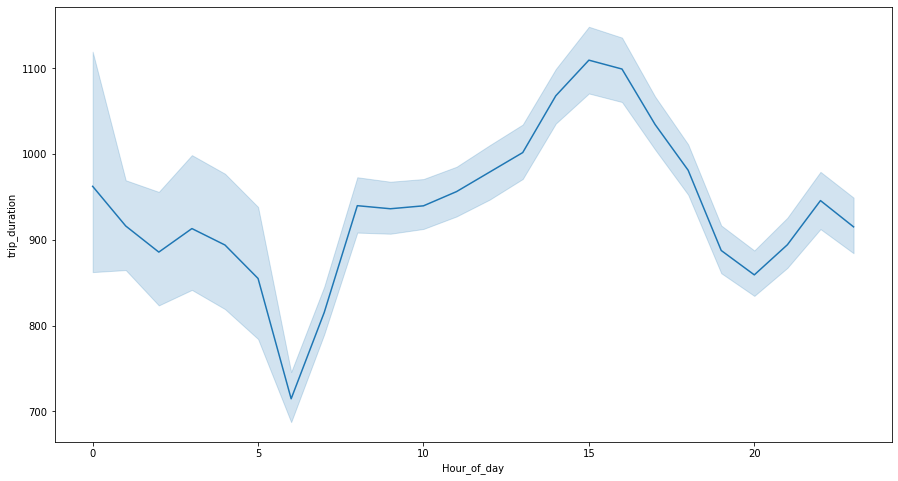

In [65]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Hour_of_day' , y = 'trip_duration' , data = df)

In [66]:
# We can see that during the early hours in the morning and late hours in night , there are less rides as compared to rest 
# of the hours of the day

In [67]:
# lets now focus on passenger count values

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

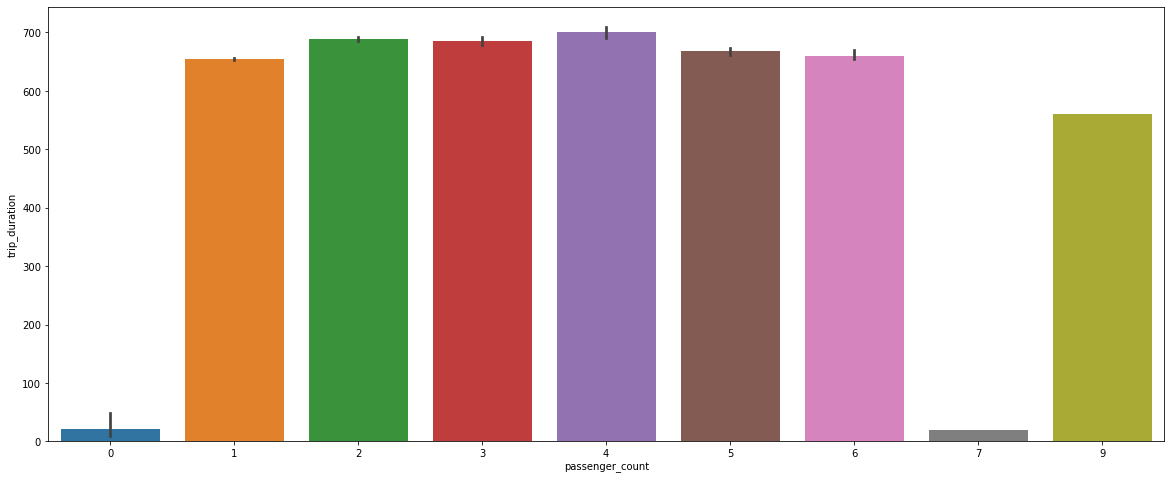

In [68]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'passenger_count' , y = 'trip_duration' , data = df , estimator = np.median)

In [69]:
# well.. most of the passengers have approximately similar median , hence their distribtion of data should be similar

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

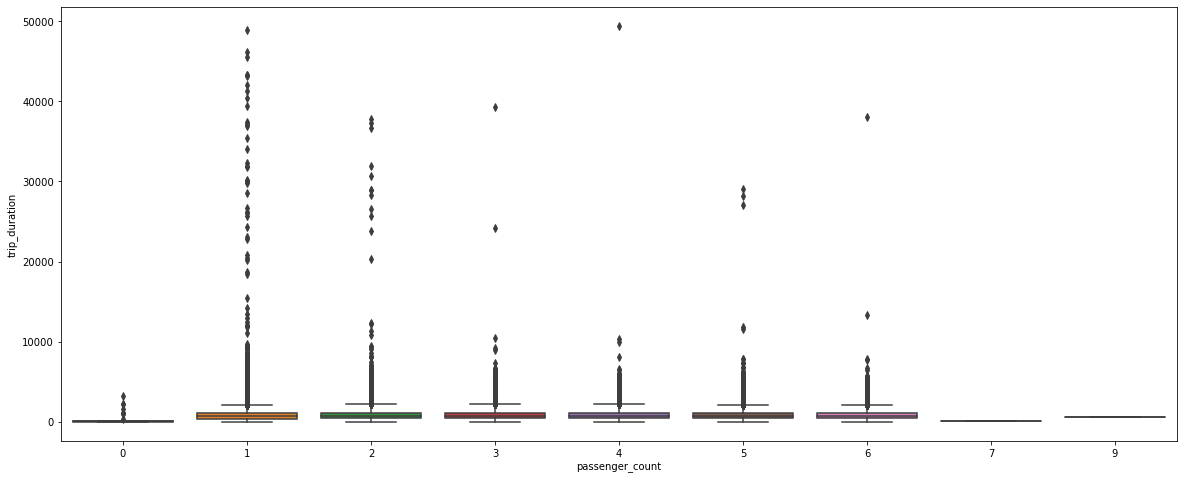

In [70]:
plt.figure(figsize = (20,8))
sns.boxplot(x = 'passenger_count' , y = 'trip_duration' , data = df_chopped)

In [71]:
# we can see heavy outliers present with single passenger trips and the outliers continue to decrease on from their as the 
# number of passengers increases

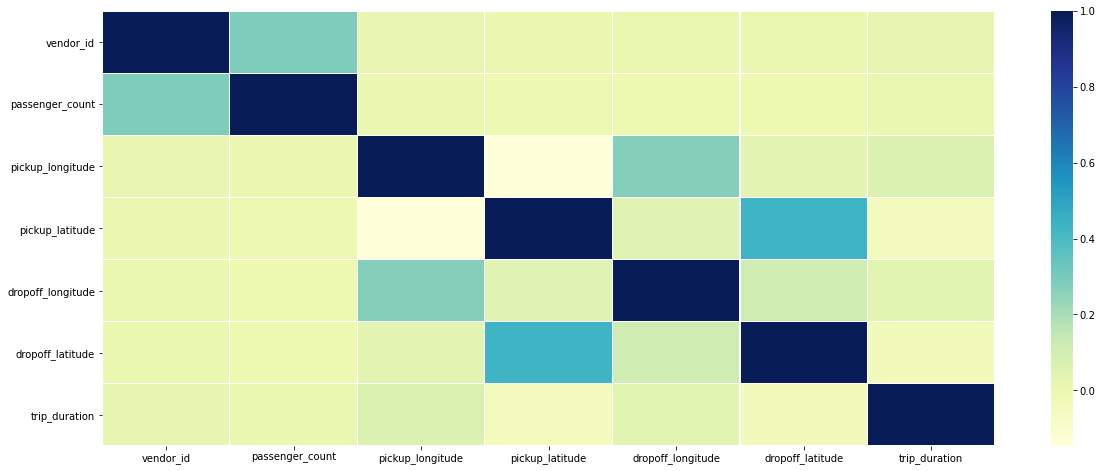

In [72]:
plt.figure(figsize = (20,8))
df = df.drop(['id' , 'pickup_datetime' , 'dropoff_datetime' , 'log_trip_duration' , 'check_trip_duration' , 'Store_and_Fwd_flag' , 'weekday' , 'Hour_of_day'], axis = 1)
corr = df.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")